## Poisoning attacks

### Load data

In [41]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from evaluate_performance import evaluatePerformance

dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(os.path.join(dir,'..'))))


In [42]:
## Retrieve models
dt_model_path = os.path.join(dir, '..', 'KaggleModel', 'fraud_model_dt.pkl')
dt_model = joblib.load(dt_model_path)

rf_model_path = os.path.join(dir, '..', 'KaggleModel', 'random_forest_model.pkl')
rf_model = joblib.load(rf_model_path)

gb_model_path = os.path.join(dir, '..', 'KaggleModel', 'fraud_model_gb.pkl')
gb_model = joblib.load(gb_model_path)

In [43]:
## Retrieve training data
csv_path = os.path.join(dir, '..', 'KaggleModel', 'cc_data.csv')

## Read csv file and extract data
data = pd.read_csv(csv_path)
X = data.drop(columns=['fraud'])
y = data["fraud"].values  # Labels (0 = Not Fraud, 1 = Fraud)

### Get Feature Importances

In [44]:
def get_feature_importances(model):
    importances = model.feature_importances_
    feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    print(feature_importances)

In [54]:
print("Feature importances for decision tree:\n")
get_feature_importances(dt_model)

print("\nFeature importances for random forest:\n")
get_feature_importances(rf_model)

print("\nFeature importances for gradiant boosting model:\n")
get_feature_importances(gb_model)

Feature importances for decision tree:

                          Feature  Importance
2  ratio_to_median_purchase_price    0.422632
6                    online_order    0.257501
0              distance_from_home    0.109354
5                 used_pin_number    0.104819
4                       used_chip    0.067798
1  distance_from_last_transaction    0.034779
3                 repeat_retailer    0.003118

Feature importances for random forest:

                          Feature  Importance
2  ratio_to_median_purchase_price    0.508624
6                    online_order    0.150922
0              distance_from_home    0.150084
1  distance_from_last_transaction    0.074821
5                 used_pin_number    0.059942
4                       used_chip    0.048088
3                 repeat_retailer    0.007519

Feature importances for gradiant boosting model:

                          Feature  Importance
2  ratio_to_median_purchase_price    0.448025
6                    online_order    0.2

### Poison data by attacking top 3 most important features

In [46]:
data_copy = data.copy()
data_copy['ratio_to_median_purchase_price'] = 0
data_copy['online_order'] = 1
data_copy['distance_from_home'] = 5

### Extract data for poisoned models

In [47]:
# Extract data for poisoned model
new_X = data_copy.drop(columns=['fraud'])
new_y = data_copy["fraud"].values  # Labels (0 = Not Fraud, 1 = Fraud)

### Train poisoned models

In [48]:
# Train-test split with poisoned decision tree model
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42, stratify=y)
poisoned_dt_model = DecisionTreeClassifier(random_state=42)
poisoned_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Train-test split with poisoned random forest model
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42, stratify=y)
poisoned_rf_model = RandomForestClassifier(random_state=42)
poisoned_rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Train-test split with poisoned gradient boosting model
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42, stratify=y)
poisoned_gb_model = GradientBoostingClassifier(random_state=42)
poisoned_gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluate models

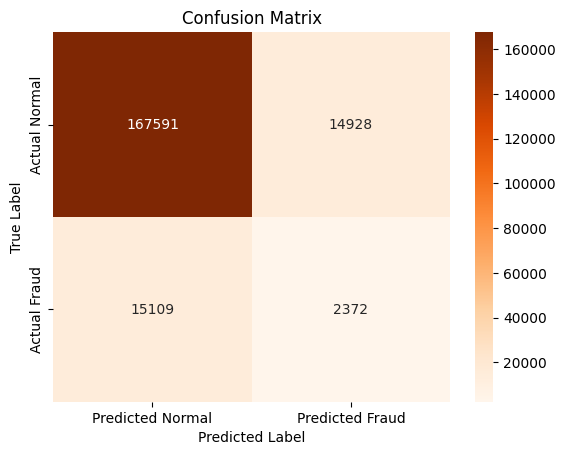

Accuracy: 0.8498
Precision: 0.1371
Recall: 0.1357
F1-score: 0.1364
ROC AUC: 0.5270


In [51]:
evaluatePerformance(poisoned_dt_model,X_test,y_test)

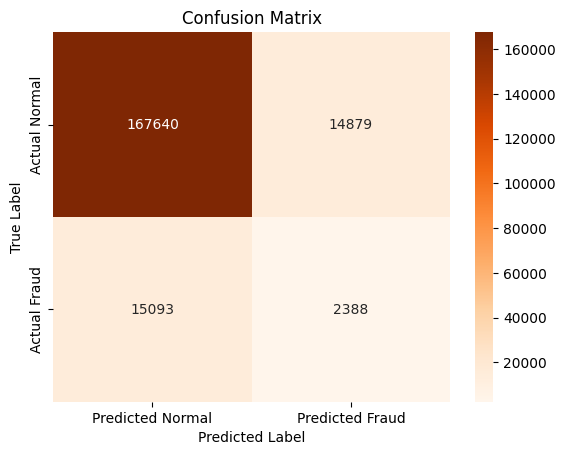

Accuracy: 0.8501
Precision: 0.1383
Recall: 0.1366
F1-score: 0.1374
ROC AUC: 0.5558


In [52]:
evaluatePerformance(poisoned_rf_model,X_test,y_test)

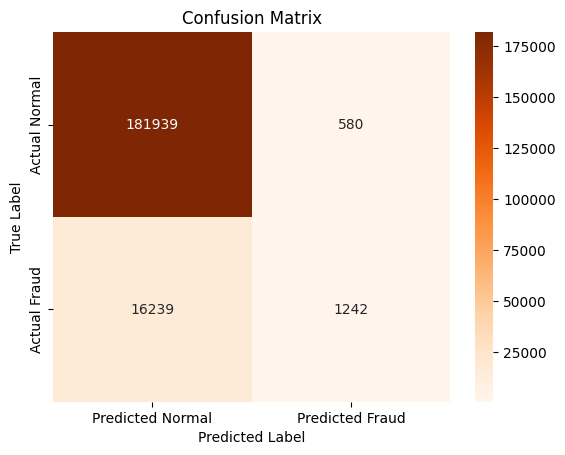

Accuracy: 0.9159
Precision: 0.6817
Recall: 0.0710
F1-score: 0.1287
ROC AUC: 0.6233


In [53]:
evaluatePerformance(poisoned_gb_model,X_test,y_test)